## Parametry

In [1]:
SERIES_LENGHT = 72
VALUES_DATATYPE = 'float64'
LEARNING_RATE = 0.0005
EPOCHS = 10
BATCH_SIZE = 32
COMPRESSION = 51

## Wczytanie danych z pliku

In [2]:
import numpy as np

data = np.load("../resources/" + "data_%s_series_%d_compression_%d.npy" % (VALUES_DATATYPE, SERIES_LENGHT, COMPRESSION))
print(data)
print(data.shape)

[[[-2.51618507e-01 -2.25788487e-01 -2.57859923e-02 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [-2.51618507e-01 -2.47745554e-01 -2.57859923e-02 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [-2.51618507e-01 -2.69702620e-01 -7.36712015e-02 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  ...
  [ 5.33446376e+00 -4.89273283e-01 -3.37039852e-01 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 1.47387369e-01 -5.55144482e-01 -4.56752875e-01 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [-2.51618507e-01 -4.23402084e-01 -3.84925061e-01 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]]

 [[-2.51618507e-01 -4.45359150e-01 -5.76465898e-01 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [-2.51618507e-01 -4.01445018e-01 -5.04638084e-01 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [-2.51618507e-01 -3.79487951e-01 -3.37039852e-01 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  ...
  [-2.51618507e-01 -7.0

## Wydzielenie zbiorów

In [3]:
from sklearn.model_selection import train_test_split

X = data[:, :SERIES_LENGHT - 1, :]
Y = data[:, SERIES_LENGHT - 1, :]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)
print("Dane treningowe: "+ str(X_train.shape))

Dane treningowe: (25360, 71, 37)


## Definicja sieci

In [4]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import *
from script.main.loss_functions import *
import tensorflow as tf

model = Sequential()
model.add(LSTM(units=37, activation=tf.keras.layers.LeakyReLU(alpha=0.3), return_sequences=True, input_shape=(SERIES_LENGHT - 1,37)))
model.add(LSTM(units=37, activation=tf.keras.layers.LeakyReLU(alpha=0.3), return_sequences=True))
model.add(LSTM(units=37, activation=tf.keras.layers.LeakyReLU(alpha=0.3)))
model.add(Dense(19))
model.compile(loss=mean_proportional_loss_func, optimizer=Adam(lr=LEARNING_RATE), metrics=['accuracy'])

Using TensorFlow backend.


## Diagram sieci

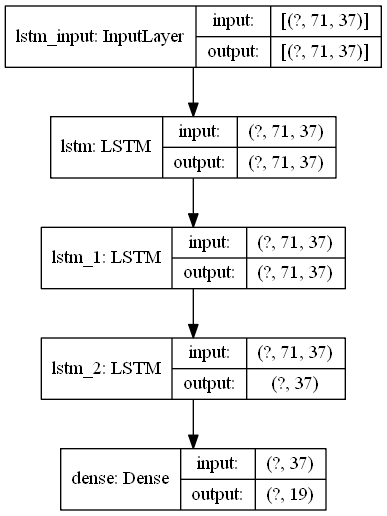

In [5]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

## Uczenie

In [ ]:
from script.main.callback.hyperdash_callback import HyperdashCallback
my_callbacks = [
    tf.keras.callbacks.TensorBoard(log_dir='.\logs', histogram_freq=1),
    HyperdashCallback(),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)
]
 
model.fit(X_train,Y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=2, callbacks=my_callbacks, validation_data=(X_test, Y_test))


Train on 25360 samples, validate on 8454 samples
Epoch 1/10
| progress:   0.100000 |
| loss:   0.330741 |
| val_loss:   0.263361 |
25360/25360 - 118s - loss: 0.3307 - accuracy: 0.2407 - val_loss: 0.2634 - val_accuracy: 0.3279
Epoch 2/10
| progress:   0.100000 |
| loss:   0.228426 |
| val_loss:   0.190184 |
25360/25360 - 126s - loss: 0.2284 - accuracy: 0.4025 - val_loss: 0.1902 - val_accuracy: 0.4839
Epoch 3/10
| progress:   0.055647 |
| loss:   0.172779 |
| val_loss:   0.158390 |
25360/25360 - 119s - loss: 0.1728 - accuracy: 0.5140 - val_loss: 0.1584 - val_accuracy: 0.5448
Epoch 4/10
| progress:   0.021958 |
| loss:   0.150821 |
| val_loss:   0.147469 |
25360/25360 - 117s - loss: 0.1508 - accuracy: 0.5517 - val_loss: 0.1475 - val_accuracy: 0.5633
Epoch 5/10
| progress:   0.008551 |
| loss:   0.142270 |
| val_loss:   0.139178 |
25360/25360 - 119s - loss: 0.1423 - accuracy: 0.5644 - val_loss: 0.1392 - val_accuracy: 0.5699
Epoch 6/10
| progress:   0.004953 |
| loss:   0.137317 |
| val_los

## Zapis modelu od pliku

In [ ]:
model.save("../resources/trained_model_type2.h5", save_format='tf')

## Zapis danych testowych do pliku

In [ ]:
np.save("../resources/test_data/X_test", X_test)
np.save("../resources/test_data/Y_test", Y_test)

## 